In [24]:
import pandas as pd 
import os
import cv2
from skimage.transform import resize 
from skimage.io import imread 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
import random

In [1]:
import pandas as pd
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
from skimage import feature, exposure
from skimage.measure import regionprops, label
from skimage.morphology import remove_small_objects, skeletonize
from skimage.feature import local_binary_pattern, hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import skew, kurtosis
from joblib import dump
import warnings

In [5]:
##TRAIN IMAGES

def load_images_from_folder(folder, target_size=(256, 256)):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img = cv2.imread(os.path.join(label_folder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Resize image to a consistent size
                img_resized = cv2.resize(img, target_size)
                images.append(img_resized)
                labels.append(label)
    return images, labels

# Example: loading images from the dataset folder
dataset_path = "DATA_BASE\DATA_BASE_TRAIN_LARGER\IMAGES_PRESPROCESSED_LARGER\CLEAN"
images, labels = load_images_from_folder(dataset_path)

# Convert lists to numpy arrays if needed later
images = np.array(images)
labels = np.array(labels)

<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\javil\AppData\Local\Temp\ipykernel_5768\2714507330.py:18: SyntaxWarning: invalid escape sequence '\D'
  dataset_path = "DATA_BASE\DATA_BASE_TRAIN_LARGER\IMAGES_PRESPROCESSED_LARGER\CLEAN"


In [8]:
##TEST IMAGES

def load_images_from_folder(folder, target_size=(256, 256)):
    images_test = []
    labels_test = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        for filename in os.listdir(label_folder):
            img = cv2.imread(os.path.join(label_folder, filename), cv2.IMREAD_GRAYSCALE)
            if img is not None:
                # Resize image to a consistent size
                img_resized = cv2.resize(img, target_size)
                images_test.append(img_resized)
                labels_test.append(label)
    return images_test, labels_test

# Example: loading images from the dataset folder
dataset_path_test = "DATA_BASE\DATA_BASE_TEST\IMAGES_PREPROCESSED_TEST\CLEAN"
images_test, labels_test = load_images_from_folder(dataset_path_test)

# Convert lists to numpy arrays if needed later
images_test = np.array(images_test)
labels_test = np.array(labels_test)

<>:18: SyntaxWarning: invalid escape sequence '\D'
<>:18: SyntaxWarning: invalid escape sequence '\D'
C:\Users\javil\AppData\Local\Temp\ipykernel_5768\3914729295.py:18: SyntaxWarning: invalid escape sequence '\D'
  dataset_path_test = "DATA_BASE\DATA_BASE_TEST\IMAGES_PREPROCESSED_TEST\CLEAN"


In [9]:
print(images.shape)
print(labels.shape)
print(images_test.shape)
print(labels_test.shape)


(3922, 256, 256)
(3922,)
(840, 256, 256)
(840,)


Loaded 3922 images with corresponding labels.
Image shape: (256, 256)


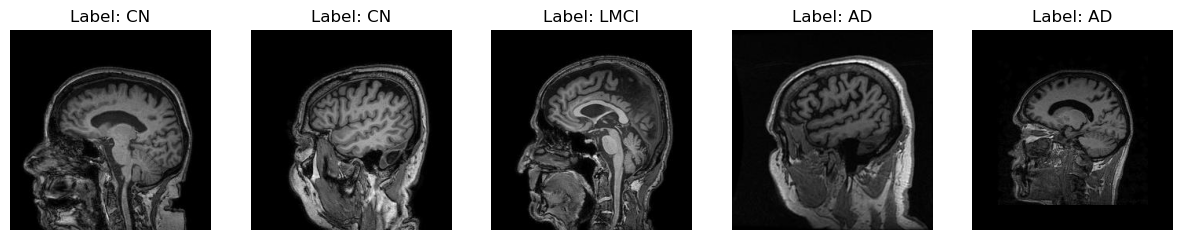

In [10]:
# Validate the loading process
print(f"Loaded {len(images)} images with corresponding labels.")
print(f"Image shape: {images[0].shape}")

# Display the first 5 images to validate
plt.figure(figsize=(15, 5))  # Adjusted figure size to fit all images

for i in range(5):
    somenum = random.randint(0, len(images) - 1)
    plt.subplot(1, 5, i+1)  # 1 row, 5 columns, ith subplot
    plt.imshow(images[somenum], cmap='gray')
    plt.title(f"Label: {labels[somenum]}")
    plt.axis('off')  # Turn off axes for clarity

#plt.savefig('images_loaded_clean.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()

Loaded 840 images with corresponding labels.
Image shape: (256, 256)


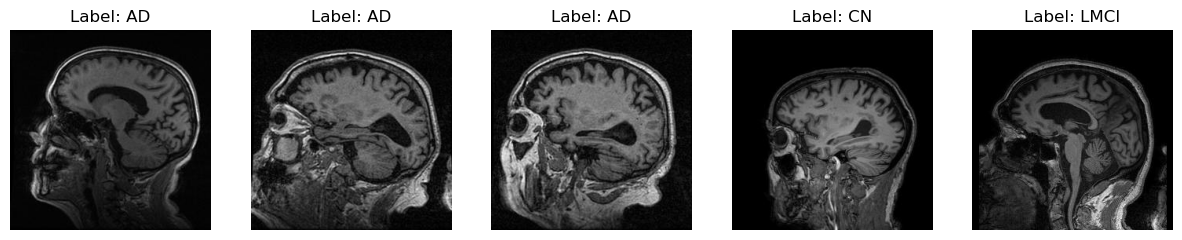

In [11]:
# Validate the loading process
print(f"Loaded {len(images_test)} images with corresponding labels.")
print(f"Image shape: {images_test[0].shape}")

# Display the first 5 images to validate
plt.figure(figsize=(15, 5))  # Adjusted figure size to fit all images

for i in range(5):
    somenum = random.randint(0, len(images_test) - 1)
    plt.subplot(1, 5, i+1)  # 1 row, 5 columns, ith subplot
    plt.imshow(images_test[somenum], cmap='gray')
    plt.title(f"Label: {labels_test[somenum]}")
    plt.axis('off')  # Turn off axes for clarity

#plt.savefig('images_loaded_clean.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()

In [12]:
# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
def apply_clahe(images):
    clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(8, 8))
    return np.array([clahe.apply(image) for image in images])

# Apply CLAHE to the loaded images
images_clahe = apply_clahe(images)
images_clahe_test = apply_clahe(images_test)
print(images_clahe.shape)
print(images_clahe_test.shape)

(3922, 256, 256)
(840, 256, 256)


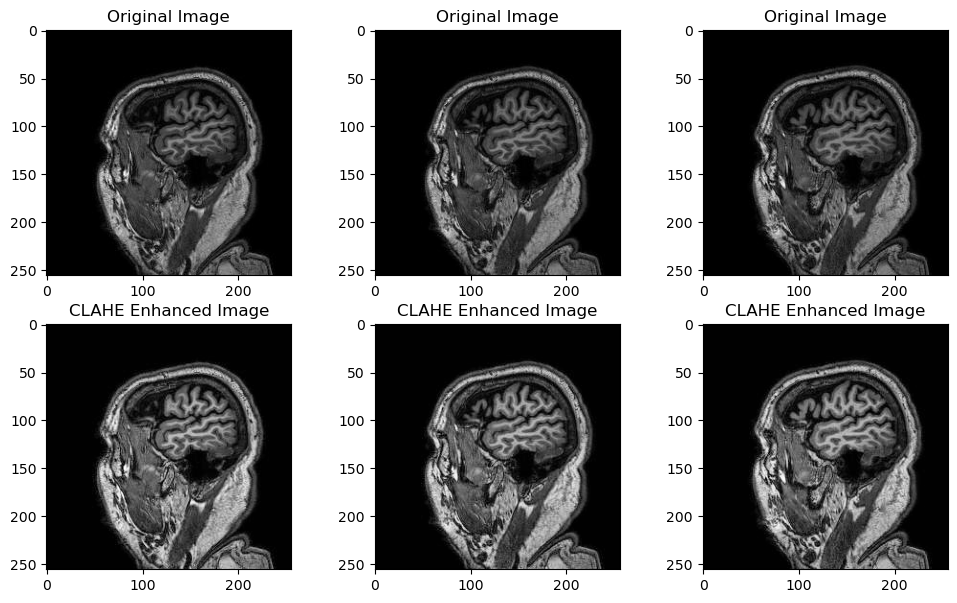

In [13]:
    plt.figure(figsize=(12,7))

    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(images[1], cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 3, 2)
    plt.imshow(images[2], cmap='gray')
    plt.title('Original Image')

    plt.subplot(2, 3, 3)
    plt.imshow(images[3], cmap='gray')
    plt.title('Original Image')

    # CLAHE enhanced image
    plt.subplot(2, 3, 4)
    plt.imshow(images_clahe[1], cmap='gray')
    plt.title('CLAHE Enhanced Image')

    plt.subplot(2, 3, 5)
    plt.imshow(images_clahe[2], cmap='gray')
    plt.title('CLAHE Enhanced Image')

    plt.subplot(2, 3, 6)
    plt.imshow(images_clahe[3], cmap='gray')
    plt.title('CLAHE Enhanced Image')


    #plt.savefig('images_clahe_together.jpg', format='jpg', bbox_inches='tight')
    plt.show()
    plt.close()

In [14]:
def enhanced_region_growing(image, threshold=0.2):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # Use Otsu's method to get a better threshold
    _, otsu = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    otsu_threshold = _ / 255.0

    # Combine Otsu's threshold with the original threshold
    final_threshold = (threshold + otsu_threshold) / 2

    # Initialize label matrix
    labels = np.zeros_like(image)
    label_counter = 1

    # Find seed points
    seeds = np.where(image > final_threshold * image.max())

    for seed in zip(*seeds):
        if labels[seed] == 0:  # Unvisited pixel
            seed_label = label(image > final_threshold * image.max())
            labels[seed_label == seed_label[seed]] = label_counter
            label_counter += 1

    return labels

segmented_images = [enhanced_region_growing(img) for img in images_clahe]
segmented_images_test = [enhanced_region_growing(img) for img in images_clahe_test]

print(segmented_images[1].shape)
print(segmented_images_test[1].shape)

C:\Users\javil\AppData\Local\Temp\ipykernel_5768\138617368.py:22: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  labels[seed_label == seed_label[seed]] = label_counter
C:\Users\javil\AppData\Local\Temp\ipykernel_5768\138617368.py:22: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  labels[seed_label == seed_label[seed]] = label_counter
C:\Users\javil\AppData\Local\Temp\ipykernel_5768\138617368.py:22: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 25

(256, 256)
(256, 256)


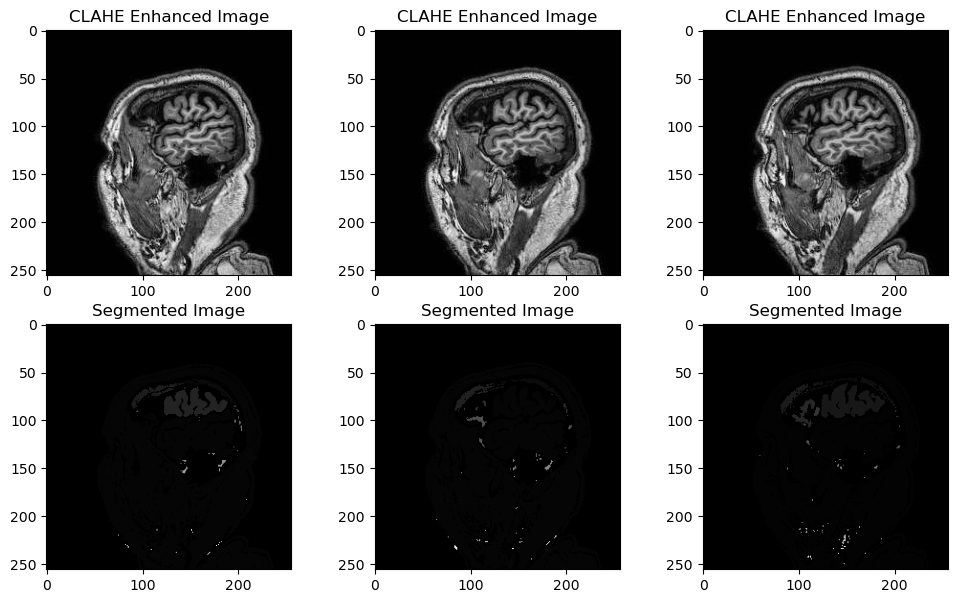

In [15]:
    plt.figure(figsize=(12, 7))

    # Original image
    plt.subplot(2, 3, 1)
    plt.imshow(images_clahe[0], cmap='gray')
    plt.title('CLAHE Enhanced Image')

    plt.subplot(2, 3, 2)
    plt.imshow(images_clahe[1], cmap='gray')
    plt.title('CLAHE Enhanced Image')

    plt.subplot(2, 3, 3)
    plt.imshow(images_clahe[2], cmap='gray')
    plt.title('CLAHE Enhanced Image')

    # CLAHE enhanced image
    plt.subplot(2, 3, 4)
    plt.imshow(segmented_images[0], cmap='gray')
    plt.title('Segmented Image')

    plt.subplot(2, 3, 5)
    plt.imshow(segmented_images[1], cmap='gray')
    plt.title('Segmented Image')

    plt.subplot(2, 3, 6)
    plt.imshow(segmented_images[2], cmap='gray')
    plt.title('Segmented Image')


    #plt.savefig('images_segmented_together.jpg', format='jpg', bbox_inches='tight')
    plt.show()
    plt.close()

In [35]:
# Enhanced LBP features
def enhanced_lbp(image, P=24, R=3):
    lbp = local_binary_pattern(image, P, R, method='uniform')
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2))
    hist = hist.astype('float')
    hist /= (hist.sum() + 1e-6)
    return hist

Validating Image 1


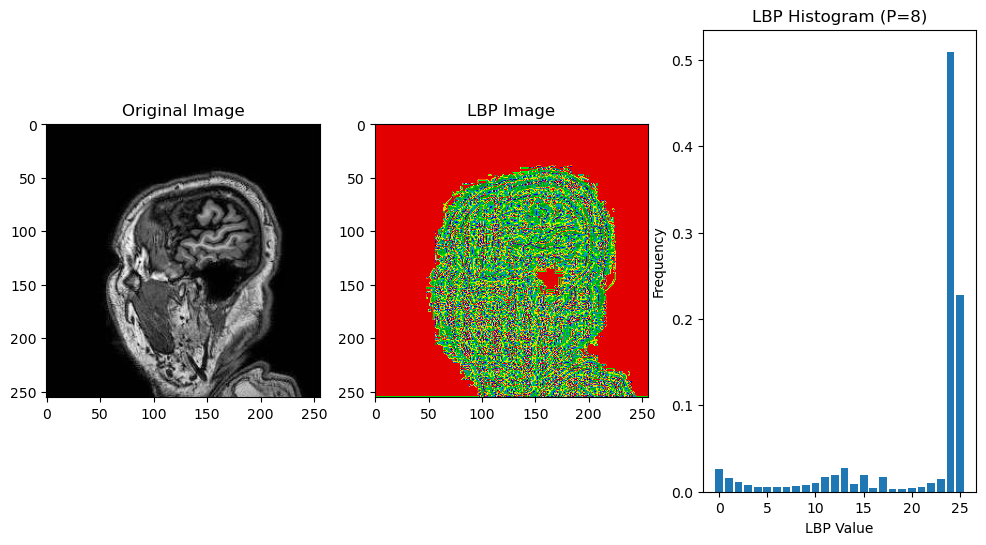

Validating Image 2


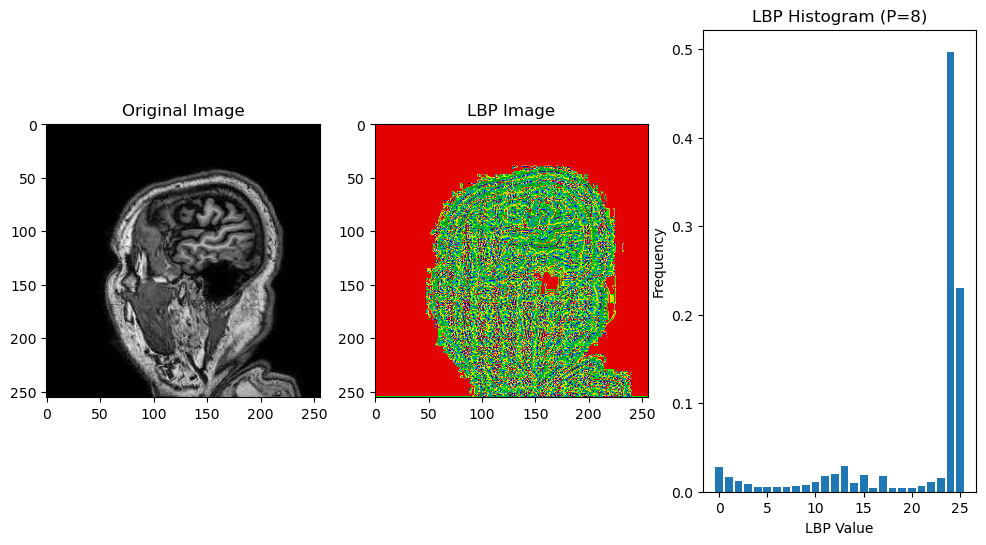

Validating Image 3


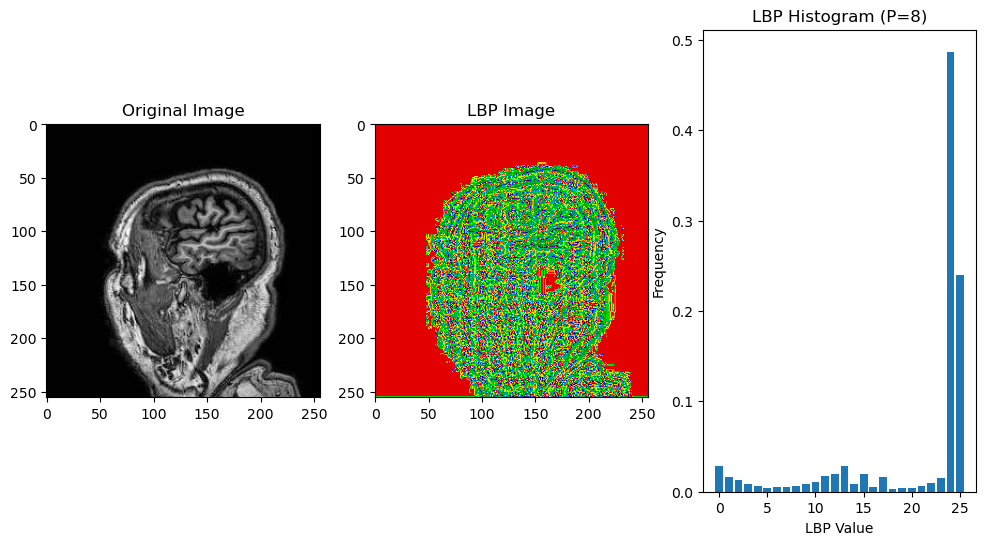

In [11]:
# Function to visualize LBP
def visualize_lbp(lbp_histogram, image, P=8, R=1):
    lbp = local_binary_pattern(image, P, R, method='uniform')
    plt.figure(figsize=(12, 6))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    # LBP Image
    plt.subplot(1, 3, 2)
    plt.imshow(lbp, cmap='nipy_spectral')
    plt.title('LBP Image')
    
    plt.subplot(1, 3, 3)
    plt.bar(range(len(lbp_histogram)), lbp_histogram)
    plt.title(f'LBP Histogram (P={P})')
    plt.xlabel('LBP Value')
    plt.ylabel('Frequency')
    



# Validation function for LBP
def validate_lbp_features(images):
    for idx, img in enumerate(images[:3]):  # Display results for the first 3 images
        lbp_histogram = enhanced_lbp(img)

        # Visualization
        print(f"Validating Image {idx + 1}")
        visualize_lbp(lbp_histogram,img, P=8, R=1)

        plt.savefig('images_lbp_features (' + str(idx+1) + ').jpg', format='jpg', bbox_inches='tight')
        plt.show()
        plt.close()
# Call the validation function
validate_lbp_features(images_clahe)

In [41]:
def enhanced_morphological_features(segmented_img, intensity_image):
    features = []
    labeled_img = label(segmented_img)
    skeleton = skeletonize(segmented_img)

    regions = regionprops(labeled_img, intensity_image=intensity_image)

    for region in regions:
        if region.area == 0 or region.perimeter == 0:
            continue

        # Calculate shape descriptors
        solidity = region.solidity
        extent = region.extent
        euler_number = region.euler_number

        # Calculate texture features
        glcm = feature.graycomatrix(intensity_image[region.bbox[0]:region.bbox[2],
                                                   region.bbox[1]:region.bbox[3]],
                                    [1], [0, np.pi/4, np.pi/2, 3*np.pi/4],
                                    symmetric=True, normed=True)
        contrast = feature.graycoprops(glcm, 'contrast').mean()
        dissimilarity = feature.graycoprops(glcm, 'dissimilarity').mean()
        homogeneity = feature.graycoprops(glcm, 'homogeneity').mean()
        energy = feature.graycoprops(glcm, 'energy').mean()
        correlation = feature.graycoprops(glcm, 'correlation').mean()

        # Calculate intensity statistics with error handling
        intensities = intensity_image[region.coords[:, 0], region.coords[:, 1]]
        intensity_mean = np.mean(intensities)
        intensity_std = np.std(intensities)

        # Handle skewness and kurtosis with warnings
        with warnings.catch_warnings():
            warnings.filterwarnings('error')
            try:
                intensity_skewness = skew(intensities)
            except Warning:
                intensity_skewness = 0  # or some other default value

            try:
                intensity_kurtosis = kurtosis(intensities)
            except Warning:
                intensity_kurtosis = 0  # or some other default value

        feature_dict = {
            'Area': region.area,
            'Perimeter': region.perimeter,
            'Circularity': (4 * np.pi * region.area) / (region.perimeter ** 2 + 1e-10),
            'Eccentricity': region.eccentricity,
            'Major_Axis_Length': region.major_axis_length,
            'Minor_Axis_Length': region.minor_axis_length,
            'Solidity': solidity,
            'Extent': extent,
            'Euler_Number': euler_number,
            'Contrast': contrast,
            'Dissimilarity': dissimilarity,
            'Homogeneity': homogeneity,
            'Energy': energy,
            'Correlation': correlation,
            'Intensity_Mean': intensity_mean,
            'Intensity_Std': intensity_std,
            'Intensity_Skewness': intensity_skewness,
            'Intensity_Kurtosis': intensity_kurtosis,
        }

        features.append(feature_dict)

    return features

In [16]:
# HOG features
def calculate_hog(image):
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)
    return fd

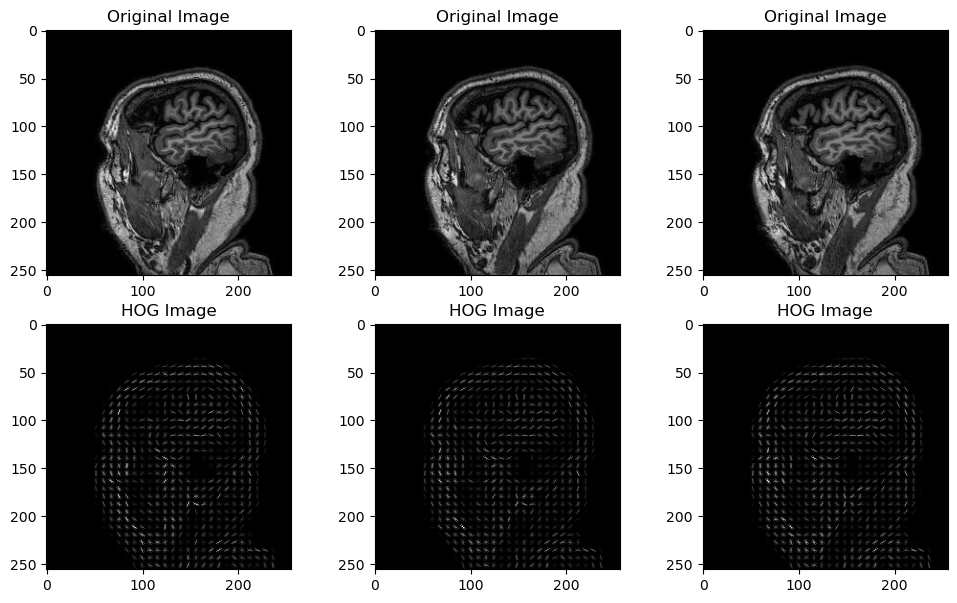

In [17]:
fd1, hog_image1 = hog(images_clahe[1], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
fd1, hog_image2 = hog(images_clahe[2], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
fd1, hog_image3 = hog(images_clahe[3], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

plt.figure(figsize=(12,7))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(images[1], cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(images[2], cmap='gray')
plt.title('Original Image')

plt.subplot(2, 3, 3)
plt.imshow(images[3], cmap='gray')
plt.title('Original Image')

    # CLAHE enhanced image
plt.subplot(2, 3, 4)
plt.imshow(hog_image1, cmap='gray')
plt.title('HOG Image')

plt.subplot(2, 3, 5)
plt.imshow(hog_image2, cmap='gray')
plt.title('HOG Image')

plt.subplot(2, 3, 6)
plt.imshow(hog_image3, cmap='gray')
plt.title('HOG Image')


#plt.savefig('HOG_images_together.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()

In [36]:
# Gabor filter features
def gabor_features(image):
    num_scales = 4
    num_orientations = 9
    gabor_responses = []

    for scale in range(num_scales):
        for orientation in range(num_orientations):
            frequency = 0.1 / (2 ** scale)
            theta = orientation * np.pi / num_orientations
            kernel = cv2.getGaborKernel((21, 21), 5, theta, frequency, 0.5, 0, ktype=cv2.CV_32F)
            filtered = cv2.filter2D(image, cv2.CV_8UC3, kernel)
            gabor_responses.append(filtered.mean())
            gabor_responses.append(filtered.std())

    return np.array(gabor_responses)

In [42]:
# Enhanced feature extraction
def enhanced_extract_features(images, segmented_images):
    all_features = []
    feature_names = []

    for img, segmented_img in zip(images, segmented_images):
        # LBP features
        lbp_hist = enhanced_lbp(img)

        # HOG features
        hog_features = calculate_hog(img)

        # Gabor features
        #gabor_feats = gabor_features(img)

        # Morphological features
        morph_features = enhanced_morphological_features(segmented_img, img)

        if not morph_features:  # Skip if no regions found
            continue

        # Combine all features
        combined_features = np.concatenate([
            lbp_hist,
            hog_features,
            #gabor_feats,
            list(morph_features[0].values())
        ])

        all_features.append(combined_features)

        # Generate feature names (only need to do this once)
        if not feature_names:
            feature_names = (
                    [f'LBP_{i}' for i in range(len(lbp_hist))] +
                    [f'HOG_{i}' for i in range(len(hog_features))] +
                    #[f'Gabor_{i}' for i in range(len(gabor_feats))] +
                    list(morph_features[0].keys())
            )

    return np.array(all_features), feature_names

In [39]:
from sklearn.utils import shuffle

In [43]:
    # Extracción de características
features, feature_names = enhanced_extract_features(images_clahe, segmented_images)
features_test, feature_names_test = enhanced_extract_features(images_clahe_test, segmented_images_test)

    # Preparación de Datos
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)
encoded_labels_test = le.fit_transform(labels_test)
#X_train, y_train = train_test_split(features, encoded_labels, test_size=0.0, random_state=42, shuffle=True)
#X_test, y_test = train_test_split(features_test, encoded_labels_test, test_size=0.0, random_state=42, shuffle=True)


X_train, y_train = shuffle(features, encoded_labels, random_state=42)
X_test, y_test = shuffle(features_test, encoded_labels_test, random_state=42)

    # Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled.shape)
print(X_test_scaled.shape)
    # Balanceo // SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
print(X_train_resampled.shape)

(3922, 34640)
(840, 34640)
(4152, 34640)


In [28]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [29]:
# Grid Parameters

param_grid = ParameterGrid(
                {'n_estimators': [50, 100, 150, 200, 350, 600],
                 'max_depth'   : [None],
                 'criterion'   : ['log_loss', 'gini']
                }
            )

# training model

results = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    model = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 42,
                ** params
             )
    
    model.fit(X_train_resampled, y_train_resampled)
    
    results['params'].append(params)
    results['oob_accuracy'].append(model.oob_score_)
    print(f"Modelo: {params} \u2713")

# Results
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.sort_values('oob_accuracy', ascending=False)
results = results.drop(columns='params')
results.head(5)

Modelo: {'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 50} ✓
Modelo: {'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 100} ✓
Modelo: {'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 150} ✓
Modelo: {'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 200} ✓
Modelo: {'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 350} ✓
Modelo: {'criterion': 'log_loss', 'max_depth': None, 'n_estimators': 600} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 100} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 150} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 350} ✓
Modelo: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 600} ✓


,oob_accuracy,criterion,max_depth,n_estimators
4,0.993497,log_loss,None,350
5,0.993497,log_loss,None,600
3,0.993015,log_loss,None,200
11,0.993015,gini,None,600
10,0.991811,gini,None,350


log_loss_350
Random Forest Accuracy: 0.6285714285714286
Random Forest depth: 1
Random Forest Accuracy: 0.6416666666666667
Random Forest depth: 2
Random Forest Accuracy: 0.6726190476190477
Random Forest depth: 3
Random Forest Accuracy: 0.680952380952381
Random Forest depth: 4
Random Forest Accuracy: 0.6928571428571428
Random Forest depth: 5
Random Forest Accuracy: 0.7083333333333334
Random Forest depth: 6
Random Forest Accuracy: 0.7297619047619047
Random Forest depth: 7
Random Forest Accuracy: 0.7261904761904762
Random Forest depth: 8
Random Forest Accuracy: 0.7202380952380952
Random Forest depth: 9
Random Forest Accuracy: 0.7273809523809524
Random Forest depth: 10
Random Forest Accuracy: 0.7321428571428571
Random Forest depth: 11
Random Forest Accuracy: 0.7416666666666667
Random Forest depth: 12
Random Forest Accuracy: 0.7380952380952381
Random Forest depth: 13
Random Forest Accuracy: 0.7452380952380953
Random Forest depth: 14
Random Forest Accuracy: 0.7333333333333333
Random Forest de

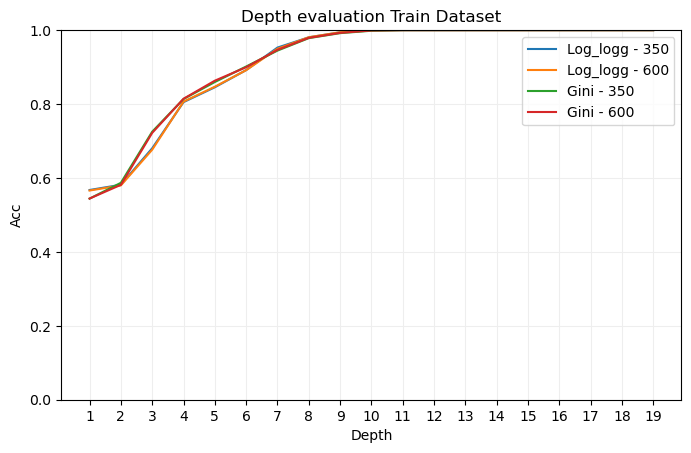

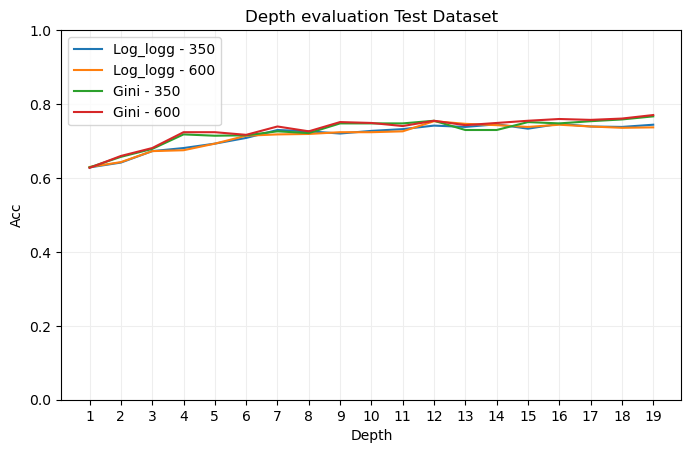

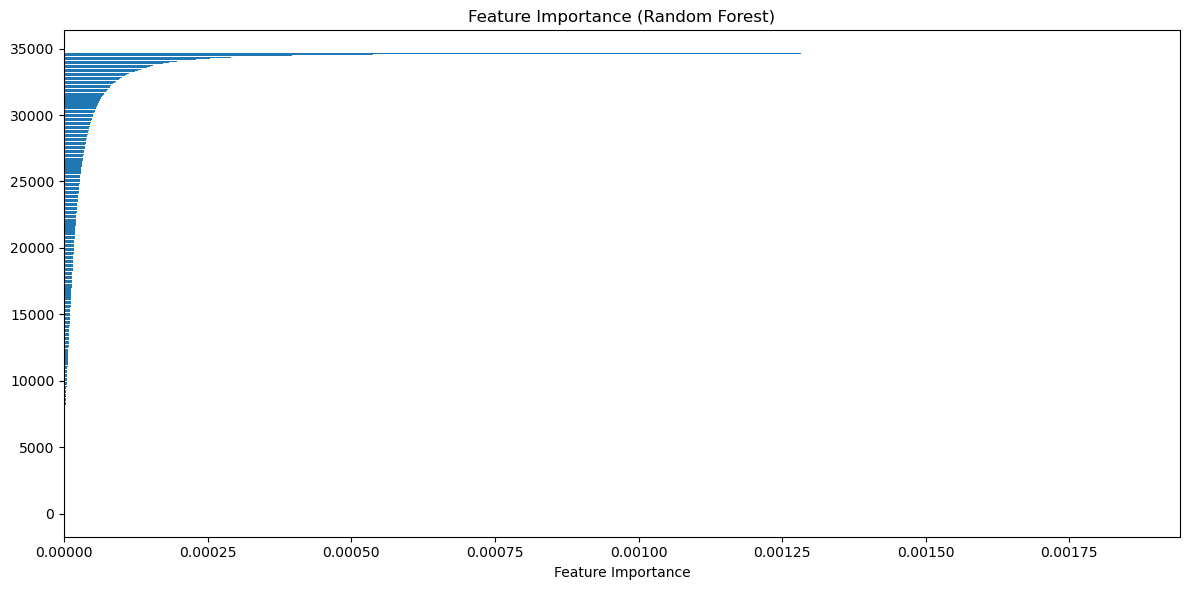

Script execution completed.


In [44]:
# Train and evaluate Random Forest

train_scores_log_350 = []
test_scores_log_350 = []

train_scores_log_600 = []
test_scores_log_600 = []

train_scores_gini_350 = []
test_scores_gini_350 = []

train_scores_gini_600 = []
test_scores_gini_600 = []

print('log_loss_350')
for depth in range(1, 20):       
    rf = RandomForestClassifier(n_estimators=350, criterion='log_loss', max_depth=depth, random_state=42, n_jobs=-1)
    rf.fit(X_train_resampled, y_train_resampled)
    rf_pred = rf.predict(X_test_scaled)
    print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
    print("Random Forest depth:", depth)
    #print(classification_report(y_test, rf_pred))
    train_scores_log_350.append(rf.score(X_train_resampled, y_train_resampled))
    test_scores_log_350.append(rf.score(X_test_scaled, y_test))
print('log_loss_600')
for depth in range(1, 20):       
    rf = RandomForestClassifier(n_estimators=600, criterion='log_loss', max_depth=depth, random_state=42, n_jobs=-1)
    rf.fit(X_train_resampled, y_train_resampled)
    rf_pred = rf.predict(X_test_scaled)
    print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
    print("Random Forest depth:", depth)
    #print(classification_report(y_test, rf_pred))
    train_scores_log_600.append(rf.score(X_train_resampled, y_train_resampled))
    test_scores_log_600.append(rf.score(X_test_scaled, y_test))

print('Gini_350')
for depth in range(1, 20):       
    rf = RandomForestClassifier(n_estimators=350, criterion='gini', max_depth=depth, random_state=42, n_jobs=-1)
    rf.fit(X_train_resampled, y_train_resampled)
    rf_pred = rf.predict(X_test_scaled)
    print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
    print("Random Forest depth:", depth)
    #print(classification_report(y_test, rf_pred))
    train_scores_gini_350.append(rf.score(X_train_resampled, y_train_resampled))
    test_scores_gini_350.append(rf.score(X_test_scaled, y_test))   

print('Gini_600')
for depth in range(1, 20):       
    rf = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=depth, random_state=42, n_jobs=-1)
    rf.fit(X_train_resampled, y_train_resampled)
    rf_pred = rf.predict(X_test_scaled)
    print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
    print("Random Forest depth:", depth)
    #print(classification_report(y_test, rf_pred))
    train_scores_gini_600.append(rf.score(X_train_resampled, y_train_resampled))
    test_scores_gini_600.append(rf.score(X_test_scaled, y_test)) 


# TRAIN DATA IMAGE
fig, ax = plt.subplots(figsize = (8, 4.8))
ax.plot(range(1, 20), train_scores_log_350, label = "Log_logg - 350")
ax.plot(range(1, 20), train_scores_log_600, label = "Log_logg - 600")
ax.plot(range(1, 20), train_scores_gini_350, label = "Gini - 350")
ax.plot(range(1, 20), train_scores_gini_600, label = "Gini - 600")
plt.title('Depth evaluation Train Dataset')
plt.xlabel('Depth')
plt.ylabel('Acc')
ax.set_xticks(range(1, 20), labels = range(1, 20))
ax.grid(color = "#EEEEEE", zorder = 0)
ax.set_ylim(0, 1)
ax.legend()
plt.savefig('RF_score_train_depth_evaluation.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()


# TEST DATA IMAGE
fig, ax = plt.subplots(figsize = (8, 4.8))
ax.plot(range(1, 20), test_scores_log_350, label = "Log_logg - 350")
ax.plot(range(1, 20), test_scores_log_600, label = "Log_logg - 600")
ax.plot(range(1, 20), test_scores_gini_350, label = "Gini - 350")
ax.plot(range(1, 20), test_scores_gini_600, label = "Gini - 600")
plt.title('Depth evaluation Test Dataset')
plt.xlabel('Depth')
plt.ylabel('Acc')
ax.set_xticks(range(1, 20), labels = range(1, 20))
ax.grid(color = "#EEEEEE", zorder = 0)
ax.set_ylim(0, 1)
ax.legend()
plt.savefig('RF_score_test_depth_evaluation.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()


# Feature importance
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(feature_names)[sorted_idx])
#ax.set_xticks(0, 0.003, 0.0003)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
#plt.savefig('feature_importance_random_forest.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()

    # Save the best model
    #dump(rf, 'best_rf_model.joblib')
    #print("Best model saved as 'best_rf_model.joblib'")

print("Script execution completed.")

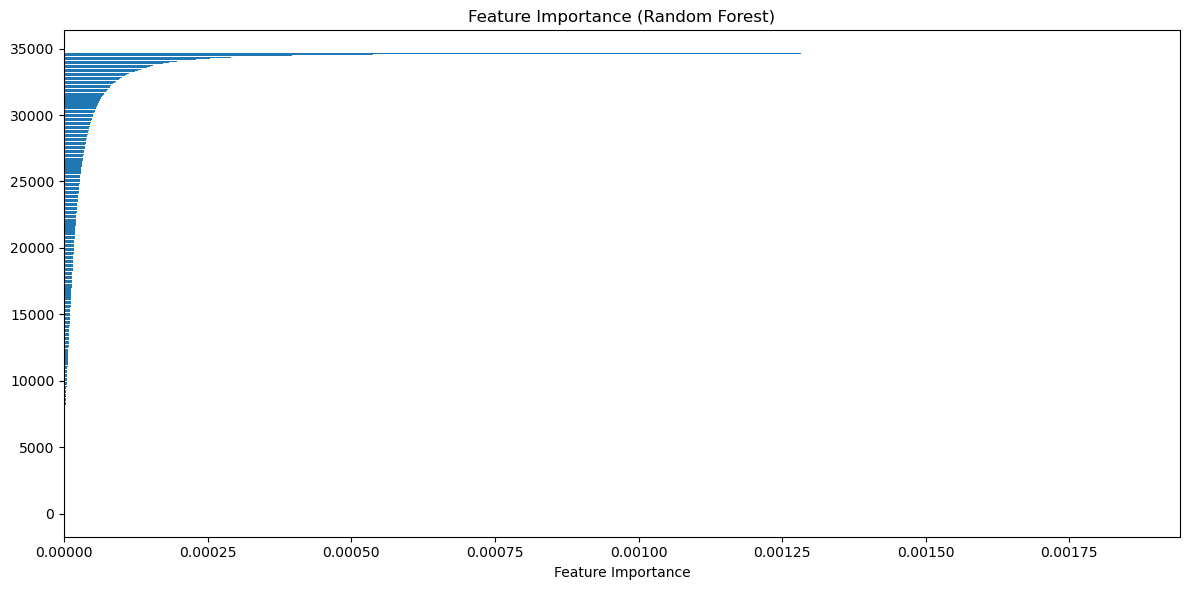

In [45]:
# Feature importance
feature_importance = rf.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
#plt.yticks(pos, np.array(feature_names)[sorted_idx])
#ax.set_xticks(0, 0.003, 0.0003)
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
#plt.savefig('feature_importance_random_forest.jpg', format='jpg', bbox_inches='tight')
plt.show()
plt.close()

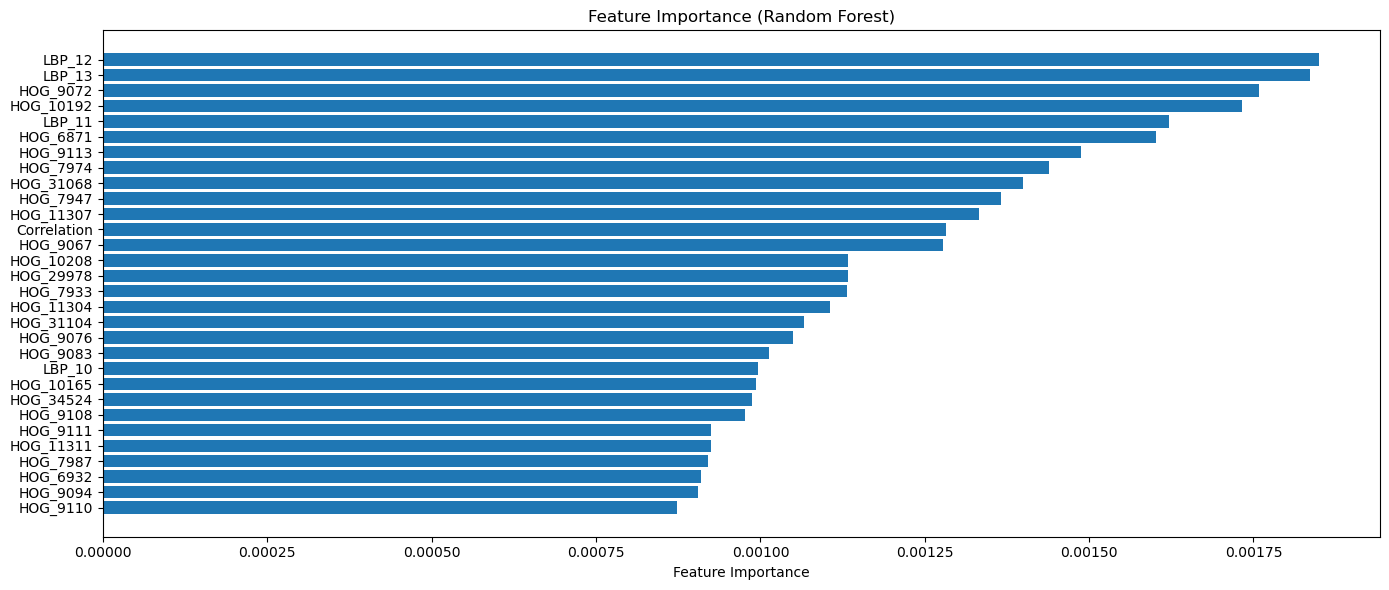

In [47]:
    # Feature importance
    
    feature_importance = rf.feature_importances_

    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(30) + .5


    plt.figure(figsize=(14, 6))
    plt.barh(pos, feature_importance[sorted_idx[max(sorted_idx)-29:]], align='center')
    plt.xlim()
    plt.yticks(pos, np.array(feature_names)[sorted_idx[max(sorted_idx)-29:]])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()


    # Guardar el gráfico en formato JPG
    plt.savefig('most_feature_importance_rf.jpg', format='jpg', bbox_inches='tight')
    plt.show()
    plt.close()




In [48]:
    rf1 = RandomForestClassifier(n_estimators=600, criterion='gini', max_depth=12, random_state=42, n_jobs=-1)
    rf1.fit(X_train_resampled, y_train_resampled)
    rf_pred1 = rf1.predict(X_test_scaled)
    print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred1))
    print("Random Forest depth:", 9)
    print(classification_report(y_test, rf_pred1))

Random Forest Accuracy: 0.7547619047619047
Random Forest depth: 9
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       0.75      0.38      0.50       276
           2       0.58      0.87      0.70       273

    accuracy                           0.75       840
   macro avg       0.78      0.75      0.73       840
weighted avg       0.78      0.75      0.74       840



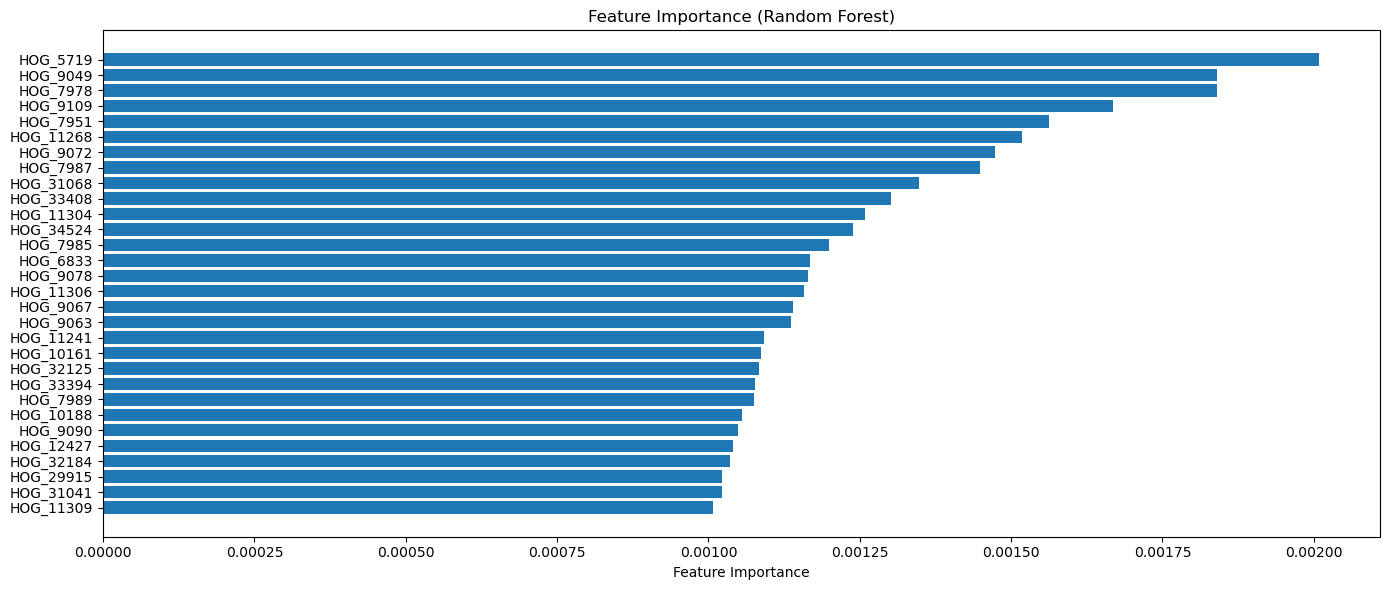

In [26]:
    # Feature importance
    
    feature_importance = rf1.feature_importances_

    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(30) + .5


    plt.figure(figsize=(14, 6))
    plt.barh(pos, feature_importance[sorted_idx[max(sorted_idx)-29:]], align='center')
    plt.xlim()
    plt.yticks(pos, np.array(feature_names)[sorted_idx[max(sorted_idx)-29:]])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance (Random Forest)')
    plt.tight_layout()


    # Guardar el gráfico en formato JPG
    plt.savefig('most_feature_importance_rf_HOG.jpg', format='jpg', bbox_inches='tight')
    plt.show()
    plt.close()

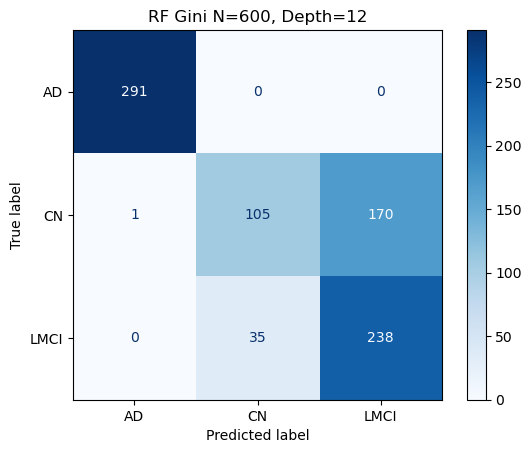

In [49]:
    # Calcular la matriz de confusión
    cmrf = confusion_matrix(y_test, rf_pred1)

    # Mostrar la matriz de confusión
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cmrf, display_labels=le.classes_)
    fig, ax = plt.subplots()

    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title('RF ' + 'Gini ' + 'N=600, Depth=12')
    #plt.show()

    # Save the RF confusion matrix as a JPG image
    plt.savefig("matrix_confusion_rf_HOG.jpg", format="jpg", bbox_inches='tight')
    plt.show()
    plt.close(fig)